# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Azharul Karim
- **Email:** azharulkarimponorogo@gmail.com
- **ID Dicoding:** azharul_karim_be62

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren penyewaan sepeda berdasarkan musim ?
- Pertanyaan 2 : Bagaimana pengaruh kondisi cuaca terhadap tingkat penyewaan sepeda ?

## Import Semua Packages/Library yang Digunakan

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [8]:
hours_dataset = pd.read_csv("data/hour.csv")
hours_dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
days_dataset = pd.read_csv("data/day.csv")
days_dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [10]:
hours_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
days_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terlihat bahwa pada kolom dteday baik di days_dataset maupun hours_dataset mempunyai jenis data object. Hal ini salah, karena seharusnya pada kolom dteday itu mempunyai jenis data datetime

In [12]:
print(hours_dataset.isna().sum())
print("====")
print(days_dataset.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
====
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Terlihat bahwa kedua dataset tidak memiliki baris yang kosong

In [13]:
print("Data yang terduplikat pada days_dataset: ", days_dataset.duplicated().sum())
print("Data yang terduplikat pada hours_dataset: ", hours_dataset.duplicated().sum())

Data yang terduplikat pada days_dataset:  0
Data yang terduplikat pada hours_dataset:  0


Terlihat tidak ada data yang terduplikat

In [14]:
hours_dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [15]:
days_dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
hours_dataset.apply(lambda x:(x.unique()))

instant       [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
dteday        [2011-01-01, 2011-01-02, 2011-01-03, 2011-01-0...
season                                             [1, 2, 3, 4]
yr                                                       [0, 1]
mnth                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
hr            [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
holiday                                                  [0, 1]
weekday                                   [6, 0, 1, 2, 3, 4, 5]
workingday                                               [0, 1]
weathersit                                         [1, 2, 3, 4]
temp          [0.24, 0.22, 0.2, 0.32, 0.38, 0.36, 0.42, 0.46...
atemp         [0.2879, 0.2727, 0.2576, 0.3485, 0.3939, 0.333...
hum           [0.81, 0.8, 0.75, 0.86, 0.76, 0.77, 0.72, 0.82...
windspeed     [0.0, 0.0896, 0.2537, 0.2836, 0.2985, 0.194, 0...
casual        [3, 8, 5, 0, 2, 1, 12, 26, 29, 47, 35, 40, 41,...
registered    [13, 32, 27, 10, 1, 0, 2, 

In [17]:
days_dataset.apply(lambda x:(x.unique()))

instant       [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
dteday        [2011-01-01, 2011-01-02, 2011-01-03, 2011-01-0...
season                                             [1, 2, 3, 4]
yr                                                       [0, 1]
mnth                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
holiday                                                  [0, 1]
weekday                                   [6, 0, 1, 2, 3, 4, 5]
workingday                                               [0, 1]
weathersit                                            [2, 1, 3]
temp          [0.344167, 0.363478, 0.196364, 0.2, 0.226957, ...
atemp         [0.363625, 0.353739, 0.189405, 0.212122, 0.229...
hum           [0.805833, 0.696087, 0.437273, 0.590435, 0.436...
windspeed     [0.160446, 0.248539, 0.248309, 0.160296, 0.186...
casual        [331, 131, 120, 108, 82, 88, 148, 68, 54, 41, ...
registered    [654, 670, 1229, 1454, 1518, 1362, 891, 768, 1...
cnt           [985, 801, 1349, 1562, 160

### Cleaning Data

In [18]:
date_columns = ["dteday"]
 
for column in date_columns:
  hours_dataset[column] = pd.to_datetime(hours_dataset[column], format="%Y-%m-%d" ,dayfirst=True)
  days_dataset[column] = pd.to_datetime(days_dataset[column],format="%Y-%m-%d" ,dayfirst=True)

In [19]:
hours_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [20]:
days_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore ...

In [21]:
hours_dataset.describe(include="all")

C:\Users\User\AppData\Local\Temp\ipykernel_10820\1625671932.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hours_dataset.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [22]:
hours_dataset.groupby('season')['cnt'].sum().sort_values(ascending=False)

season
3    1061129
2     918589
4     841613
1     471348
Name: cnt, dtype: int64

In [23]:
hours_dataset.groupby('weathersit')['cnt'].sum().sort_values(ascending=False)

weathersit
1    2338173
2     795952
3     158331
4        223
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\User\AppData\Local\Temp\ipykernel_10820\2228513042.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pertanyaan1=sns.barplot(x='season', y='cnt', data=season_cnt, palette='viridis')


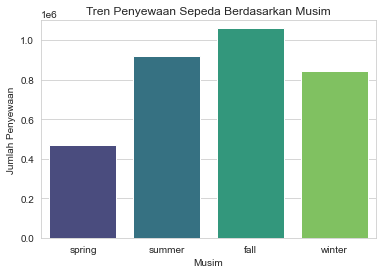

In [24]:
sns.set_style("whitegrid")
season_cnt = days_dataset.groupby('season')['cnt'].sum().reset_index()
pertanyaan1=sns.barplot(x='season', y='cnt', data=season_cnt, palette='viridis')
pertanyaan1.set_title("Tren Penyewaan Sepeda Berdasarkan Musim")
pertanyaan1.set_xlabel("Musim")
pertanyaan1.set_ylabel("Jumlah Penyewaan")
plt.xticks(ticks=range(4), labels=['spring', 'summer', 'fall', 'winter'])
plt.ylim(0, 1100000)
plt.show()

### Pertanyaan 2:

C:\Users\User\AppData\Local\Temp\ipykernel_10820\2304085307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pertanyaan2=sns.barplot(x='weathersit', y='cnt', data=weather_cnt, palette='viridis')


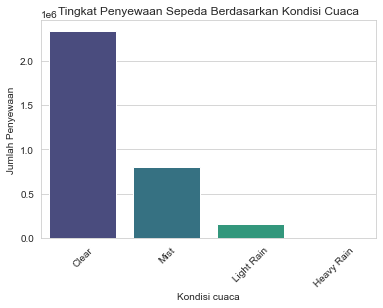

In [25]:
sns.set_style("whitegrid")
weather_cnt = hours_dataset.groupby('weathersit')['cnt'].sum().reset_index()
pertanyaan2=sns.barplot(x='weathersit', y='cnt', data=weather_cnt, palette='viridis')
pertanyaan2.set_title("Tingkat Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
pertanyaan2.set_xlabel("Kondisi cuaca")
pertanyaan2.set_ylabel("Jumlah Penyewaan")
plt.xticks(ticks=range(len(weather_cnt['weathersit'])), labels=['Clear', 'Mist', 'Light Rain', 'Heavy Rain'], rotation=45)
plt.show()

## Conclusion

- Conclution pertanyaan 1 
    
    Dari hasil terlihat bahwa jumlah penyewaan sepeda cenderung meningkat dari musim semi, musim panas, dan musim gugur, yang kemudian turun sedikit pada musim dingin (musim 4). Oleh karena itu, tren penyewaan sepeda cenderung menunjukkan pola peningkatan seiring dengan berjalannya musim dari musim semi hingga musim gugur, dengan penurunan yang sedikit terlihat pada musim dingin.
- Conclution pertanyaan 2

    Dari hasil terlihat bahwa kondisi cuaca mempengaruhi tingkat penyewaan sepeda, dengan cuaca cerah atau sedikit berawan cenderung meningkatkan minat orang untuk menyewa sepeda, sedangkan cuaca buruk seperti hujan cenderung menguranginya.